In [1]:
import pandas as pd
df = pd.read_csv('Data/딥러닝 프로젝트/상관 체크용.csv', parse_dates=['ta_ymd'])
df = df.sort_values('ta_ymd').set_index('ta_ymd')
df = df.iloc[:,:9]
del df['일시']
df

,day,weekend_or_holiday,amt,cnt,평균구매단가,평균기온(°C),최저기온(°C),최고기온(°C)
ta_ymd,,,,,,,,
2022-01-01,6,1,1329031957,71404,18612.85,-6.1,-14.1,2.1
2022-01-02,7,1,1121552026,64688,17337.87,-2.5,-9.9,4.3
2022-01-03,1,0,786141430,57049,13780.11,-4.2,-13.9,4.2
2022-01-04,2,0,776968207,55984,13878.40,-3.2,-10.6,2.5
2022-01-05,3,0,801364762,57863,13849.35,-4.4,-12.6,2.7
...,...,...,...,...,...,...,...,...
2025-02-24,1,0,701323685,47790,14675.11,-4.0,-12.0,3.6
2025-02-25,2,0,643321973,48174,13354.13,0.2,-9.0,6.8
2025-02-26,3,0,678922710,49427,13735.87,0.8,-6.0,8.3


C:\Users\campus4D019\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0701 - mae: 0.2102 - val_loss: 0.0463 - val_mae: 0.1864
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0446 - mae: 0.1787 - val_loss: 0.0312 - val_mae: 0.1496
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0237 - mae: 0.1224 - val_loss: 0.0208 - val_mae: 0.1108
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0186 - mae: 0.1035 - val_loss: 0.0275 - val_mae: 0.1363
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mae: 0.0976 - val_loss: 0.0241 - val_mae: 0.1250
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0161 - mae: 0.0959 - val_loss: 0.0209 - val_mae: 0.1146
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0150 - mae: 0.0904 - val_loss: 0.0200 - val_mae: 0.1102
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0150 - mae: 0.0898 - val_loss: 0.0182 - val_mae: 0.1028
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.014

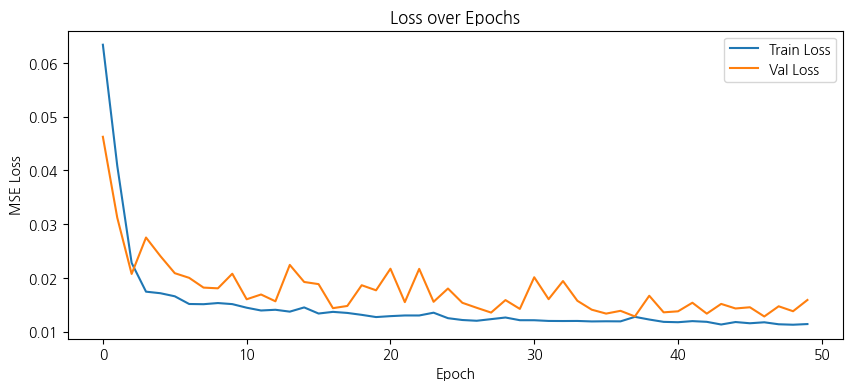

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Test MSE: 1619069.65
Test MAE: 1023.86


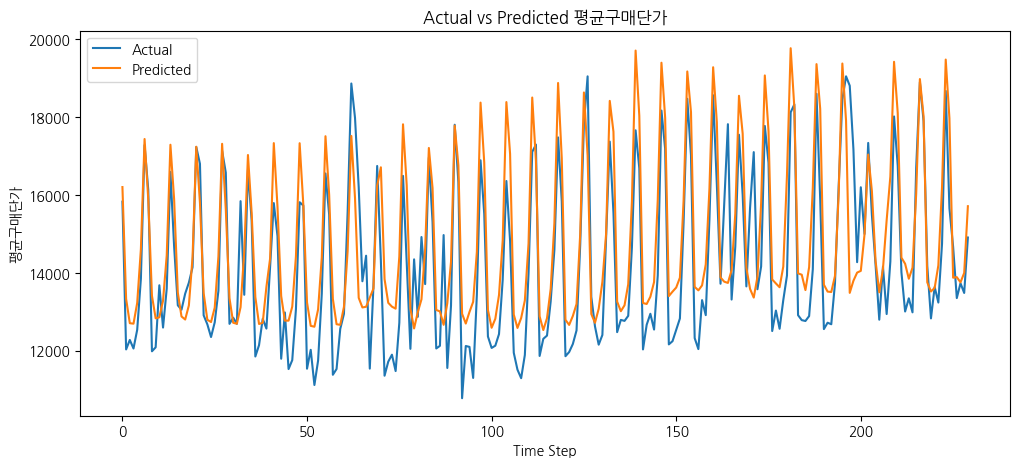

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 2) 예측할 시계열(평균구매단가) 추출 및 스케일링
y_series = df['평균구매단가'].values.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y_series)

# 3) 입력 특성 준비: '평균구매단가', 'amt', 'cnt' 및 비수치형 제외
#    → 숫자형 컬럼만 선택한 뒤 제외 목록(drop)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in numeric_cols if c not in ['평균구매단가', 'amt', 'cnt']]

# 4) X 데이터 스케일링
scaler_x = MinMaxScaler()
X_scaled_full = scaler_x.fit_transform(df[feature_cols])

# 5) 시퀀스 데이터 생성 (과거 7일치 → 다음날 예측)
seq_len = 7
X, y = [], []
for i in range(seq_len, len(df)):
    X.append(X_scaled_full[i-seq_len:i, :])
    y.append(y_scaled[i, 0])
X = np.array(X)
y = np.array(y)

# 6) 학습/테스트 분할 (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 7) LSTM 모델 정의
n_features = X.shape[2]
model = Sequential([
    LSTM(64, input_shape=(seq_len, n_features)),
    Dense(1)
])
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

# 8) 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# 9) 성능 시각화
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# 10) 예측 및 역정규화
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1,1))

# 11) 성능 평가
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Test MSE: {mse:.2f}')
print(f'Test MAE: {mae:.2f}')

# 12) 실제 vs 예측 시각화
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted 평균구매단가')
plt.xlabel('Time Step')
plt.ylabel('평균구매단가')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Permutation Feature Importances (MSE increase):
           feature  mse_increase
               day  2.487877e+06
weekend_or_holiday  8.965659e+05
          최고기온(°C)  4.528556e+05
          최저기온(°C)  2.721457e+04
          평균기온(°C) -4.580427e+04


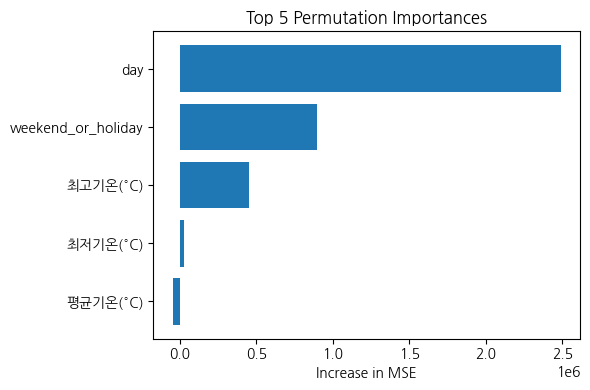

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 12) Permutation Feature Importance for LSTM
#    => measures increase in MSE when each feature is shuffled
baseline_pred = model.predict(X_test)
baseline_pred_inv = scaler_y.inverse_transform(baseline_pred)
baseline_mse = mean_squared_error(y_test_inv, baseline_pred_inv)

importances = []
for i, name in enumerate(feature_cols):
    X_perm = X_test.copy()
    rng = np.random.RandomState(42)
    # shuffle feature i across samples (all timesteps)
    X_perm[:, :, i] = rng.permutation(X_perm[:, :, i])
    y_perm_pred = model.predict(X_perm)
    y_perm_inv = scaler_y.inverse_transform(y_perm_pred)
    perm_mse = mean_squared_error(y_test_inv, y_perm_inv)
    importances.append((name, perm_mse - baseline_mse))

imp_df = pd.DataFrame(importances, columns=['feature', 'mse_increase'])\
           .sort_values('mse_increase', ascending=False)

print("Permutation Feature Importances (MSE increase):")
print(imp_df.to_string(index=False))

# 13) Top 5 importances plot
top5 = imp_df.head(5)
plt.figure(figsize=(6, 4))
plt.barh(top5['feature'], top5['mse_increase'])
plt.gca().invert_yaxis()
plt.xlabel('Increase in MSE')
plt.title('Top 5 Permutation Importances')
plt.tight_layout()
plt.show()
